In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot style
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("Set2")


In [2]:
# Load your dataset
df = pd.read_csv("inventory_dataset(1).csv")

# Convert 'date' column into datetime format
df["date"] = pd.to_datetime(df["date"])

# Check shape & first rows
print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (500, 16)


,date,store_name,product_id,product_name,category,units_sold,units_ordered,price,discount_pct,revenue,weather,season,demand_level,promotion,is_holiday,festival
0,2020-01-02,DMart,STA018,Stationery Item 18,stationery,32,40,560.28,10.73,17928.96,hot,winter,medium,0,0,New Year
1,2020-01-07,DMart,BEV017,Beverage Item 17,beverages,146,174,206.53,0.00,30153.38,hot,winter,high,1,0,New Year
2,2020-01-11,DMart,HTX002,Home Textile 2,home_textiles,8,10,3408.76,0.00,27270.08,rainy,winter,medium,0,1,NaN
3,2020-01-15,DMart,BEA013,Beauty Item 13,beauty,13,16,1945.18,0.87,25287.34,humid,winter,medium,0,0,New Year
4,2020-01-23,DMart,FTW002,Footwear Item 2,footwear,4,4,1641.18,9.95,6564.72,rainy,winter,low,0,0,NaN


In [3]:
# Dataset structure
print(df.info())

# Check missing values
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           500 non-null    datetime64[ns]
 1   store_name     500 non-null    object        
 2   product_id     500 non-null    object        
 3   product_name   500 non-null    object        
 4   category       500 non-null    object        
 5   units_sold     500 non-null    int64         
 6   units_ordered  500 non-null    int64         
 7   price          500 non-null    float64       
 8   discount_pct   500 non-null    float64       
 9   revenue        500 non-null    float64       
 10  weather        500 non-null    object        
 11  season         500 non-null    object        
 12  demand_level   500 non-null    object        
 13  promotion      500 non-null    int64         
 14  is_holiday     500 non-null    int64         
 15  festival       150 non-

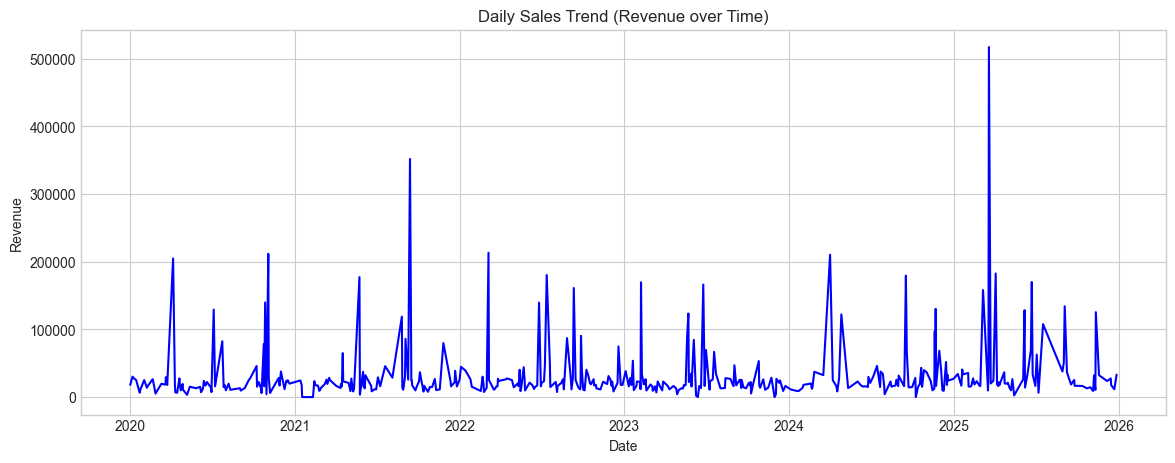

In [4]:
# Group by date and calculate total revenue
sales_trend = df.groupby("date")["revenue"].sum().reset_index()

# Plot sales trend
plt.figure(figsize=(14,5))
plt.plot(sales_trend["date"], sales_trend["revenue"], color="blue")
plt.title("Daily Sales Trend (Revenue over Time)")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()


C:\Users\PRAVALLIKA\AppData\Local\Temp\ipykernel_22488\3597016196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_sales.values, y=cat_sales.index, palette="viridis")


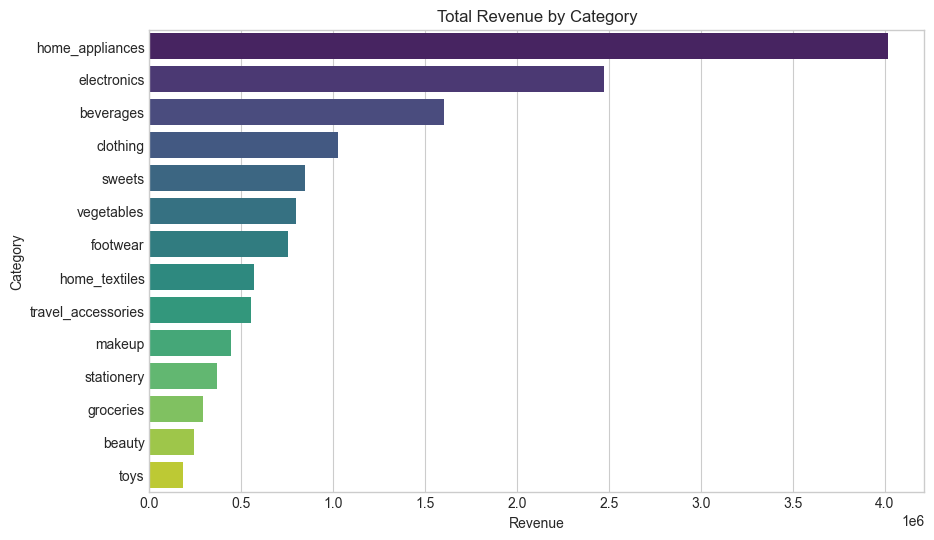

In [5]:
# Group by category and sum revenue
cat_sales = df.groupby("category")["revenue"].sum().sort_values(ascending=False)

# Plot revenue by category
plt.figure(figsize=(10,6))
sns.barplot(x=cat_sales.values, y=cat_sales.index, palette="viridis")
plt.title("Total Revenue by Category")
plt.xlabel("Revenue")
plt.ylabel("Category")
plt.show()


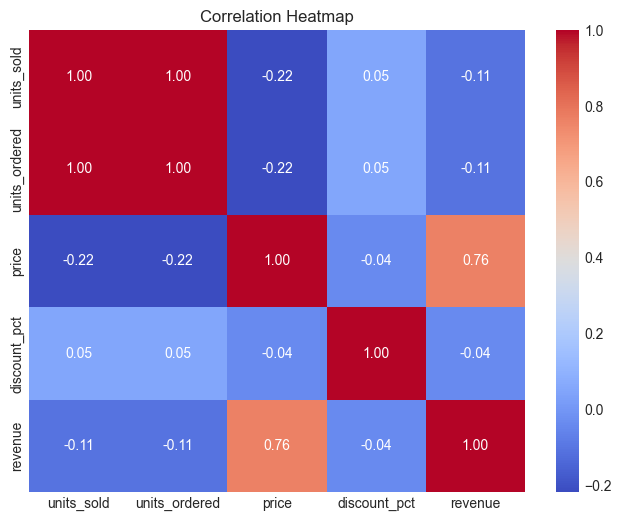

In [6]:
plt.figure(figsize=(8,6))
corr = df[["units_sold", "units_ordered", "price", "discount_pct", "revenue"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\PRAVALLIKA\AppData\Local\Temp\ipykernel_22488\1332825387.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=season_sales.index, y=season_sales.values, palette="autumn")


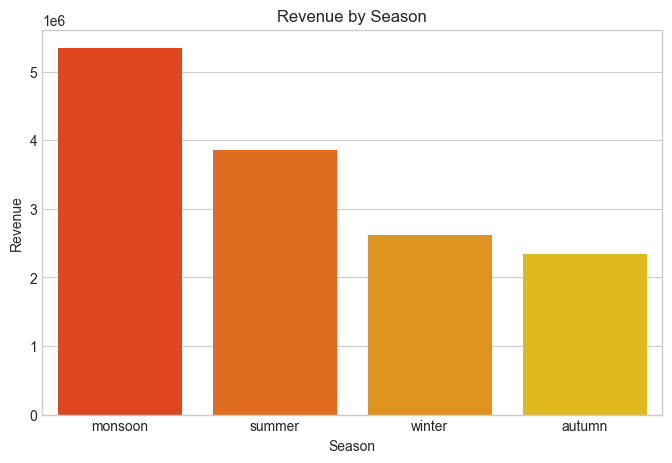

In [7]:
season_sales = df.groupby("season")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=season_sales.index, y=season_sales.values, palette="autumn")
plt.title("Revenue by Season")
plt.xlabel("Season")
plt.ylabel("Revenue")
plt.show()


C:\Users\PRAVALLIKA\AppData\Local\Temp\ipykernel_22488\61012502.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=festival_sales.values, y=festival_sales.index, palette="Spectral")


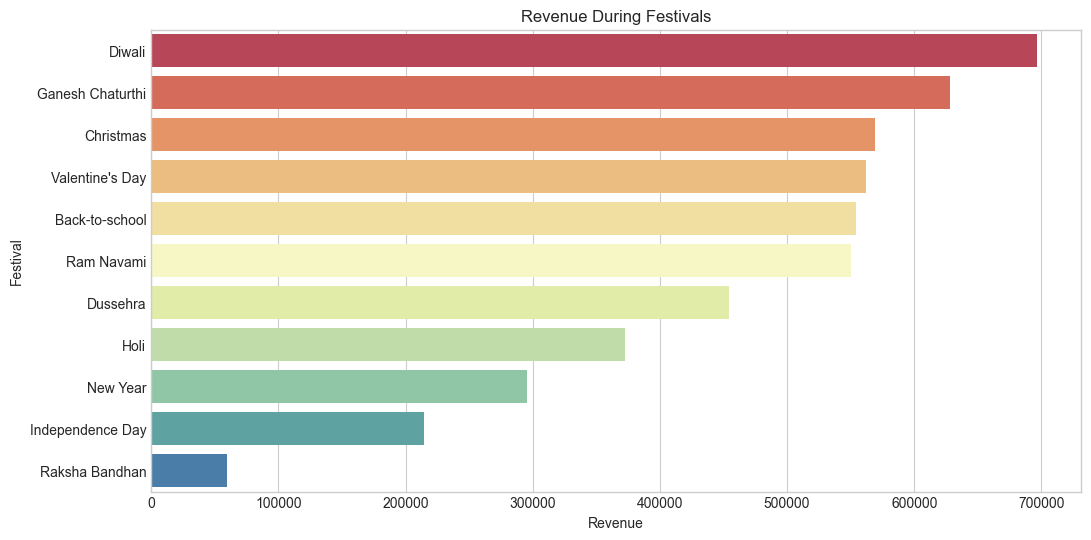

In [8]:
# ================================
# Festival Impact
# ================================
festival_sales = df[df["festival"] != ""].groupby("festival")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=festival_sales.values, y=festival_sales.index, palette="Spectral")
plt.title("Revenue During Festivals")
plt.xlabel("Revenue")
plt.ylabel("Festival")
plt.show()

C:\Users\PRAVALLIKA\AppData\Local\Temp\ipykernel_22488\3417945274.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette="Set1")


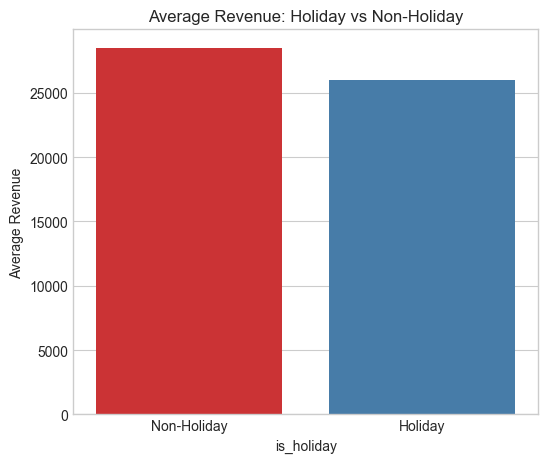

In [9]:
# ================================
# Holiday vs Non-Holiday
# ================================
holiday_sales = df.groupby("is_holiday")["revenue"].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values, palette="Set1")
plt.xticks([0,1], ["Non-Holiday", "Holiday"])
plt.title("Average Revenue: Holiday vs Non-Holiday")
plt.ylabel("Average Revenue")
plt.show()

C:\Users\PRAVALLIKA\AppData\Local\Temp\ipykernel_22488\744256321.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promo_sales.index, y=promo_sales.values, palette="pastel")


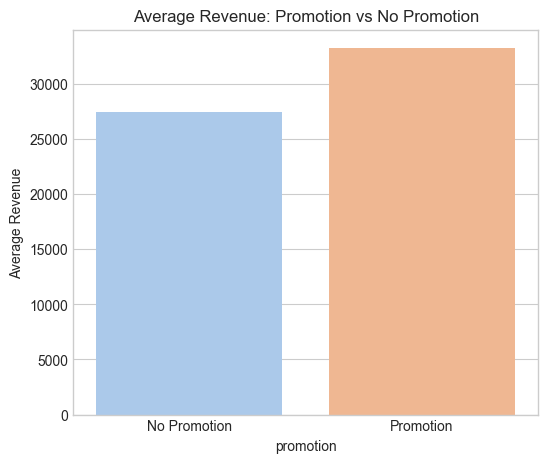

In [10]:
# ================================
# Promotion Impact
# ================================
promo_sales = df.groupby("promotion")["revenue"].mean()

plt.figure(figsize=(6,5))
sns.barplot(x=promo_sales.index, y=promo_sales.values, palette="pastel")
plt.xticks([0,1], ["No Promotion", "Promotion"])
plt.title("Average Revenue: Promotion vs No Promotion")
plt.ylabel("Average Revenue")
plt.show()

C:\Users\PRAVALLIKA\AppData\Local\Temp\ipykernel_22488\523477397.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_sales.index, y=weather_sales.values, palette="Blues")


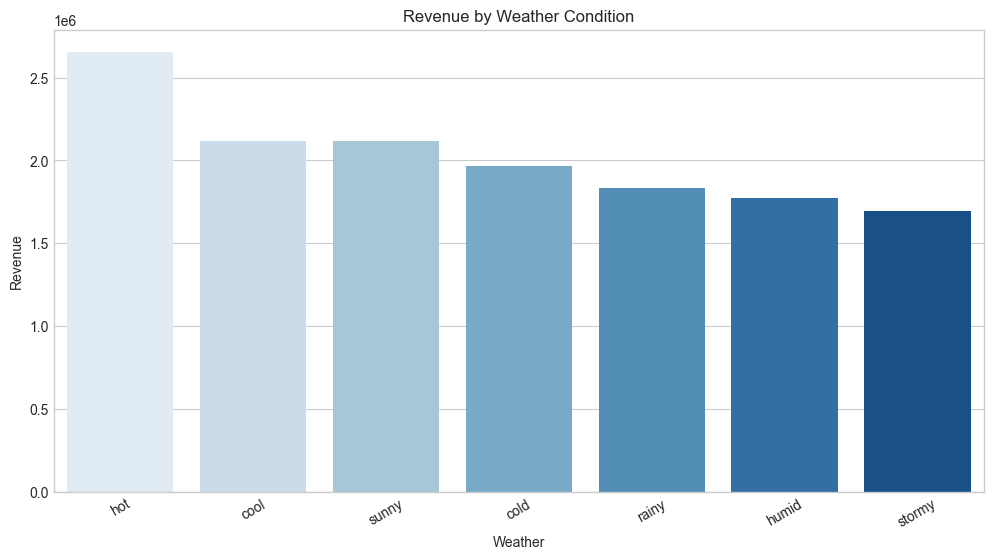

In [11]:
# ================================
# Weather Impact
# ================================
weather_sales = df.groupby("weather")["revenue"].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=weather_sales.index, y=weather_sales.values, palette="Blues")
plt.title("Revenue by Weather Condition")
plt.xlabel("Weather")
plt.ylabel("Revenue")
plt.xticks(rotation=30)
plt.show()

C:\Users\PRAVALLIKA\AppData\Local\Temp\ipykernel_22488\3071864735.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="demand_level", data=df, palette="viridis")


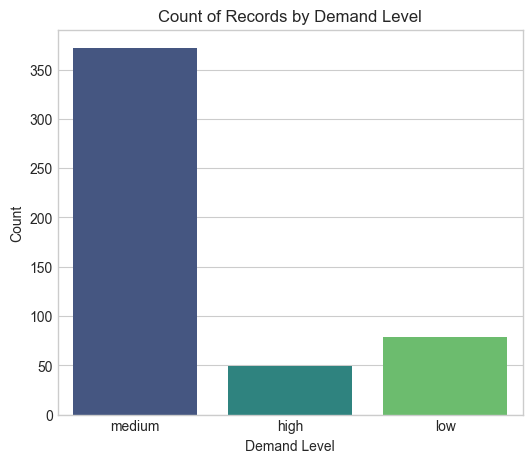

In [12]:
# ================================
# Demand Level Distribution
# ================================
plt.figure(figsize=(6,5))
sns.countplot(x="demand_level", data=df, palette="viridis")
plt.title("Count of Records by Demand Level")
plt.xlabel("Demand Level")
plt.ylabel("Count")
plt.show()

C:\Users\PRAVALLIKA\AppData\Local\Temp\ipykernel_22488\121857653.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="magma")


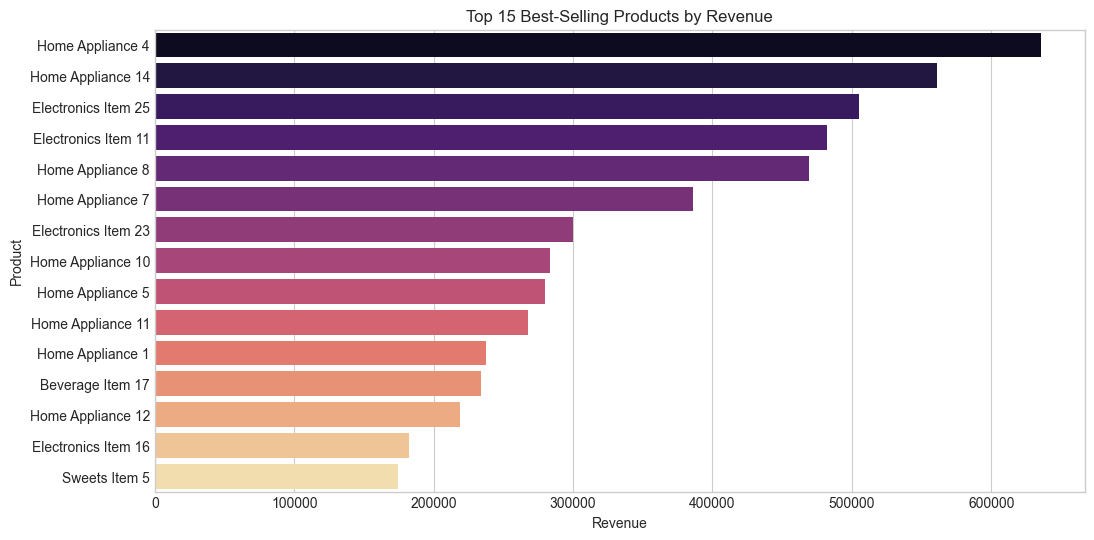

In [13]:
# ================================
# Top Selling Products
# ================================
top_products = df.groupby("product_name")["revenue"].sum().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette="magma")
plt.title("Top 15 Best-Selling Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()

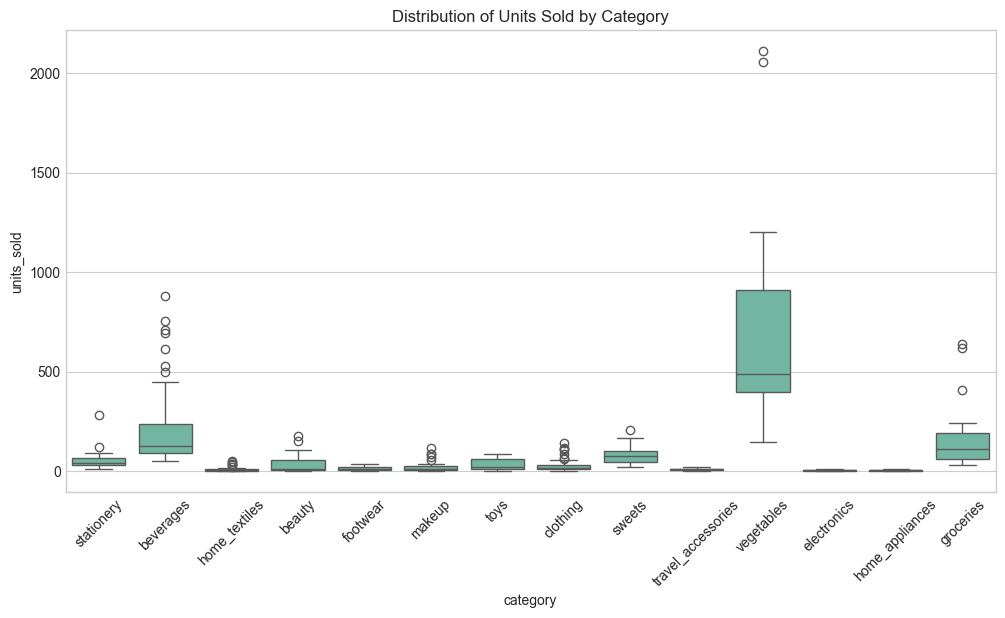

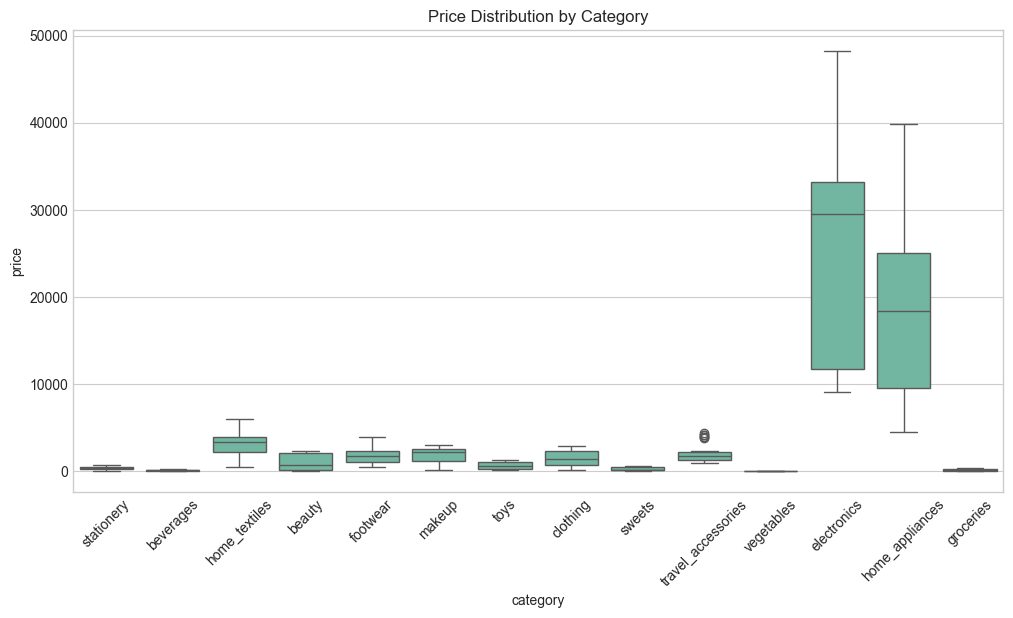

In [14]:
# ================================
# Box Plots
# ================================
plt.figure(figsize=(12,6))
sns.boxplot(x="category", y="units_sold", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Units Sold by Category")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="category", y="price", data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Category")
plt.show()
